In [1]:
# import libraries 
import pandas as pd
import numpy as np
# import matplotlib.pyplot as plt
import matplotlib.pylab as plt
%matplotlib inline
import seaborn
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LassoLarsCV


C:\Users\212458098\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# Read housing data set csv into memory
df=pd.read_csv("../data/Boston_housing_data.csv",low_memory='False')

# bug fix for display formats to avoid run time errors
pd.set_option('display.float_format', lambda x:'%f'%x)

 **Attribute Information:**

    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per $10,000
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in $1000's

In [3]:
# Upper case all data frame column names
df.columns=map(str.upper, df.columns)

#check dimensions of data set
(rows,features)= df.shape
print "Number of rows in data set - ", rows
print "Number of features in data set - ",features
print df.head(2)
df.describe()

Number of rows in data set -  506
Number of features in data set -  14
      CRIM        ZN    INDUS  CHAS      NOX       RM       AGE      DIS  RAD  \
0 0.006320 18.000000 2.310000     0 0.538000 6.575000 65.200000 4.090000    1   
1 0.027310  0.000000 7.070000     0 0.469000 6.421000 78.900000 4.967100    2   

   TAX   PTRATIO          B    LSTAT      MEDV  
0  296 15.300000 396.900000 4.980000 24.000000  
1  242 17.800000 396.900000 9.140000 21.600000  


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Categoric variable treatment

In [4]:
# Create dummy variables for CHAS
dummy_chas = pd.get_dummies(df['CHAS'], prefix='CHAS', drop_first=True)

# Create dummy variables for RAD
dummy_rad = pd.get_dummies(df['RAD'], prefix='RAD', drop_first=True)

# Join the dummy variables to the main dataframe
df = pd.concat([df, dummy_chas, dummy_rad], axis=1)
# Delete CHAS , RAD
df.drop(['CHAS','RAD'],axis=1, inplace=True)
df.head(2)
print df.columns

Index([u'CRIM', u'ZN', u'INDUS', u'NOX', u'RM', u'AGE', u'DIS', u'TAX',
       u'PTRATIO', u'B', u'LSTAT', u'MEDV', u'CHAS_1', u'RAD_2', u'RAD_3',
       u'RAD_4', u'RAD_5', u'RAD_6', u'RAD_7', u'RAD_8', u'RAD_24'],
      dtype='object')


### Normalize variables

*Normalization transforms variables to have zero mean and unit standard deviation*

In [5]:
raw_data=(df-df.mean())/df.std()

In [6]:
print raw_data.head(1)

       CRIM       ZN     INDUS       NOX       RM       AGE      DIS  \
0 -0.419367 0.284548 -1.286636 -0.144075 0.413263 -0.119895 0.140075   

        TAX   PTRATIO        B    ...        MEDV    CHAS_1     RAD_2  \
0 -0.665949 -1.457558 0.440616    ...    0.159528 -0.272329 -0.222922   

      RAD_3     RAD_4     RAD_5     RAD_6     RAD_7     RAD_8    RAD_24  
0 -0.284668 -0.526525 -0.541790 -0.232507 -0.186269 -0.222922 -0.593501  

[1 rows x 21 columns]


## Build model

In [7]:
target=raw_data['MEDV']
predictors=raw_data.drop('MEDV',axis=1)

In [8]:
# split data into train and test sets
pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, target, 
                                                              test_size=.3, random_state=123)


In [9]:
# specify the lasso regression model
model=LassoLarsCV(cv=10, precompute=False).fit(pred_train,tar_train)

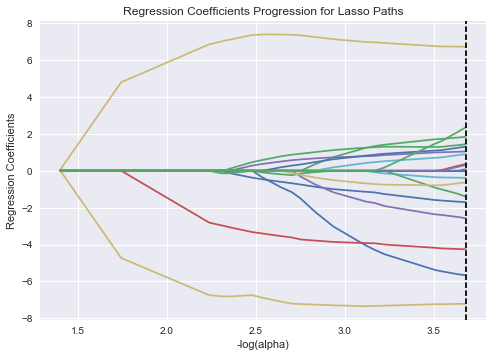

In [28]:
# print variable names and regression coefficients
dict(zip(predictors.columns, model.coef_))

fig, ax = plt.subplots()
# plot coefficient progression
m_log_alphas = -np.log10(model.alphas_)
ax = plt.gca()


# Now add the legend with some customizations.
plt.plot(m_log_alphas, model.coef_path_.T)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha CV')
# legend = plt.legend(loc='upper center', shadow=True)

plt.ylabel('Regression Coefficients')
plt.xlabel('-log(alpha)')
plt.title('Regression Coefficients Progression for Lasso Paths')

C:\Users\212458098\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app


training data MSE
0.231478683187
test data MSE
0.338807979494


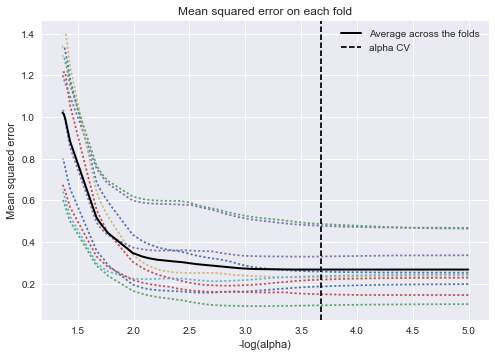

In [27]:
# plot mean square error for each fold
m_log_alphascv = -np.log10(model.cv_alphas_)
plt.figure()
plt.plot(m_log_alphascv, model.cv_mse_path_, ':')
plt.plot(m_log_alphascv, model.cv_mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha CV')
plt.legend()
plt.xlabel('-log(alpha)')
plt.ylabel('Mean squared error')
plt.title('Mean squared error on each fold')
         

# MSE from training and test data
from sklearn.metrics import mean_squared_error
train_error = mean_squared_error(tar_train, model.predict(pred_train))
test_error = mean_squared_error(tar_test, model.predict(pred_test))
print ('training data MSE')
print(train_error)
print ('test data MSE')
print(test_error)


In [26]:
# R-square from training and test data
rsquared_train=model.score(pred_train,tar_train)
rsquared_test=model.score(pred_test,tar_test)
print ('training data R-square')
print(rsquared_train)
print ('test data R-square')
print(rsquared_test)

training data R-square
0.771759996064
test data R-square
0.645436922734
